# Additive Bias and Multiplicative Bias

Bias measures how well the mean forecast and mean observation correspond to each other. It can tell us whether there is an over or under-forecast tendency and informs how a forecast system could be easily recalibrated.

`Scores` has multiplicative bias and additive bias implementations for use on continuous forecasts.

Additive bias is often called the "mean error". Since it does not tell us the average *magnitude* (i.e. average of the absolute value of the error) of the error, it is possible for there to be little or no bias even when there are large positive and negative errors.

Multiplicative bias is well suited for forecasts and observations that have 0 as an upper or lower bound (e.g., significant wave height, or wind magnitude). This could be useful for a forecaster who wants a simple method to bias correct a wind speed forecast.

**Note:** In this tutorial we use the forecast and analysis grids that are downloaded or derived in `First_Data_Fetching.ipynb`. Please run through this tutorial first to fetch data.

In [1]:
import xarray as xr
from scores.continuous import additive_bias, multiplicative_bias

In [2]:
fcst = xr.open_dataset("forecast_grid.nc")
obs = xr.open_dataset("analysis_grid.nc")

# Let's select the forecast for the same timestamp as the analysis
fcst = fcst.sel(time=obs.time.values)

### Additive bias

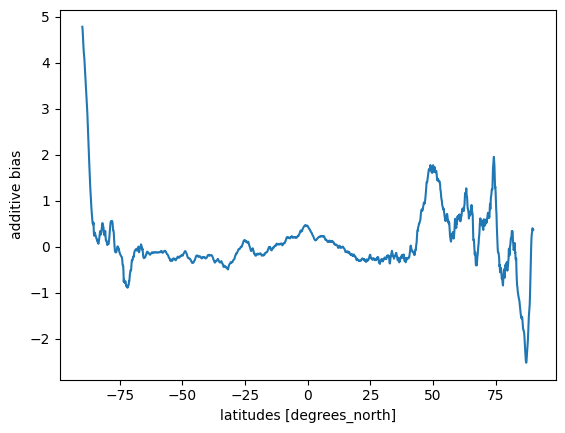

In [3]:
# Calculate additive bias and preserve the "lat" dimension
bias = additive_bias(fcst.temp_scrn, obs.temp_scrn, preserve_dims="lat")
bias.name = "additive bias"
bias.plot()

We can see how biases become larger towards the poles, but are relatively unbiased in the tropics.

### Multiplicative bias

Let's imagine that our data has a lower bound at zero and we want to calculate the multiplicative bias. To avoid downloading more data, we will convert the temperature data to be degrees Celcius and clip the data to have a minimum value of zero. Readers may wish to explore the data available from the NCI server and download a wind grid instead for this example.

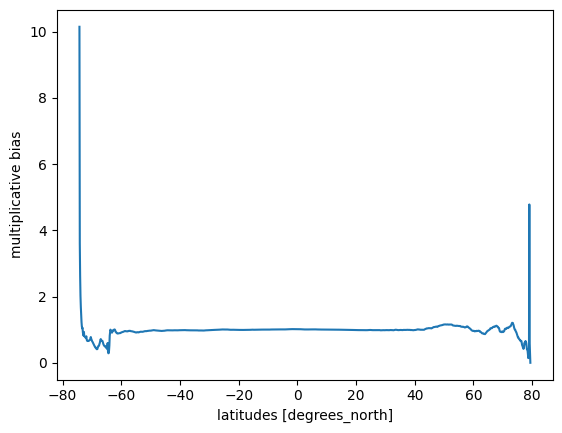

In [4]:
# Convert to Celcius and clip data to have a minimum value of zero
fcst_clipped = (fcst.temp_scrn - 273.15).clip(min=0)
obs_clipped = (obs.temp_scrn - 273.15).clip(min=0)

bias = multiplicative_bias(fcst_clipped, obs_clipped, preserve_dims="lat")
bias.name = "multiplicative bias"
bias.plot()

It's worth noting that for a latitude slice, if the mean forecast and mean observation is zero, then the multiplicative bias for that latitude slice will be `NaN`. If the mean forecast is greater than zero and the mean observation is zero, then the multiplicative bias for that slice is infinite. 

We can see below in our dataset that we have `np.inf` values, and `np.nan` values close to the poles where values are negative (remember that this data is temperature data converted to degrees Celisus and clipped to have a minimum value of zero). 

In [5]:
bias.max()


<xarray.DataArray 'multiplicative bias' ()> Size: 8B
array(inf)

In [6]:
bias

<xarray.DataArray 'multiplicative bias' (lat: 1536)> Size: 6kB
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * lat      (lat) float64 12kB 89.94 89.82 89.71 89.59 ... -89.71 -89.82 -89.94

## What to try next?
Have a look at Isotonic Regression in scores to see how conditional biases can be calculated.
